In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

The syntax of the command is incorrect.


'cp' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

The syntax of the command is incorrect.


'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
!kaggle datasets download -d smaranjitghose/corn-or-maize-leaf-disease-dataset

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
!unzip corn-or-maize-leaf-disease-dataset.zip -d ./corn-or-maize-leaf-disease-dataset

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to your dataset
dataset_path = '/content/corn-or-maize-leaf-disease-dataset/data'

# Parameters
img_height, img_width = 224, 224
batch_size = 32

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)  # 20% of data will be used for validation

# Training data generator
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')  # Set as training data

# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')  # Set as validation data


FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content/corn-or-maize-leaf-disease-dataset/data'

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [7]:
model = Sequential()

# Adjust input shape to match the generator's resized image dimensions
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='valid', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [9]:
model.fit(train_generator , validation_data=validation_generator , epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


105/105 ━━━━━━━━━━━━━━━━━━━━ 64s 515ms/step - accuracy: 0.6212 - loss: 0.9482 - val_accuracy: 0.7883 - val_loss: 0.4464
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 70s 456ms/step - accuracy: 0.8178 - loss: 0.4438 - val_accuracy: 0.8624 - val_loss: 0.3060
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 50s 455ms/step - accuracy: 0.8341 - loss: 0.4327 - val_accuracy: 0.8541 - val_loss: 0.3173
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 51s 462ms/step - accuracy: 0.8638 - loss: 0.3264 - val_accuracy: 0.8541 - val_loss: 0.3678
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 50s 454ms/step - accuracy: 0.8745 - loss: 0.2910 - val_accuracy: 0.8756 - val_loss: 0.2818
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 51s 462ms/step - accuracy: 0.8749 - loss: 0.2900 - val_accuracy: 0.8816 - val_loss: 0.2680
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 50s 456ms/step - accuracy: 0.8855 - loss: 0.2838 - val_accuracy: 0.8780 - val_loss: 0.2889
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 50s 455ms/step - accuracy: 0.8904 - loss: 0.2648 - val

In [10]:
model.evaluate(validation_generator)

27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 401ms/step - accuracy: 0.9022 - loss: 0.2791


[0.29905790090560913, 0.8971291780471802]

In [11]:
class_indices = train_generator.class_indices
print(class_indices)

{'Blight': 0, 'Common_Rust': 1, 'Gray_Leaf_Spot': 2, 'Healthy': 3}


In [12]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model
img_path = '/content/corn-or-maize-leaf-disease-dataset/data/Healthy/Corn_Health (10).jpg'

# Function to load and preprocess the image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize to [0, 1]
    return img_array

# Function to predict the class of the new image
def predict_image(model, img_path, class_indices):
    img_array = load_and_preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_label = list(class_indices.keys())[list(class_indices.values()).index(predicted_class_index)]
    return predicted_class_label
predicted_class_label = predict_image(model, img_path, class_indices)
print(f'The predicted class is: {predicted_class_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step
The predicted class is: Healthy


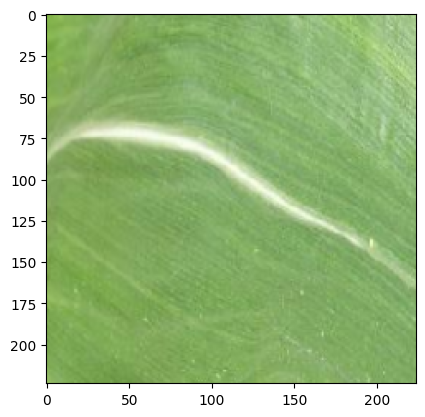

In [13]:
import matplotlib.pyplot as plt
plt.imshow(train_generator[0][0][0])

In [14]:
model.save('plant_disease_model.h5')